<a href="https://colab.research.google.com/github/Nayim-Imrit/dataAnalyticsAssignment/blob/main/CarMakeAnalysisDataUnderstanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analytics Assignment

DATA Understanding

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import missingno as msno

from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('/content/DATA/training.csv')

In [3]:
tmp = dict(df.groupby(['VNST']).size())
tmp

{'AL': 548,
 'AR': 56,
 'AZ': 4966,
 'CA': 5673,
 'CO': 4052,
 'FL': 8317,
 'GA': 1965,
 'IA': 398,
 'ID': 162,
 'IL': 376,
 'IN': 384,
 'KY': 183,
 'LA': 277,
 'MA': 11,
 'MD': 930,
 'MI': 12,
 'MN': 51,
 'MO': 591,
 'MS': 408,
 'NC': 5611,
 'NE': 23,
 'NH': 80,
 'NJ': 261,
 'NM': 202,
 'NV': 443,
 'NY': 4,
 'OH': 622,
 'OK': 2898,
 'OR': 160,
 'PA': 673,
 'SC': 3394,
 'TN': 1415,
 'TX': 10880,
 'UT': 699,
 'VA': 1327,
 'WA': 112,
 'WV': 222}

In [4]:
#Number of auctions by state
fig = go.Figure(data= go.Choropleth(
    locations=list(tmp.keys()),
    z = list(tmp.values()),
    locationmode='USA-states',
    colorscale='YlGnBu'
    ))
fig.update_layout(
geo_scope='usa')

fig.show()

In [5]:
import random

x = df[['Make', 'WarrantyCost']].groupby('Make').mean()
x = [item for sublist in x.values.tolist() for item in sublist]

y = df[['Make', 'VehBCost']].groupby('Make').mean()
y = [item for sublist in y.values.tolist() for item in sublist]

z = list(dict(df.groupby(['Make']).size()).values())
z = [float(i)/100 for i in z]
# z = [50 for i in z]
names = list(dict(df.groupby(['Make']).size()).keys())

# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers+text',
    text=names,
    textposition="middle center",
    marker=dict(
        size=z,
        color=[random.randint(0, 2000) for i in range(len(z))],
        colorscale="Rainbow"
    )
))

fig.update_layout(
    title="FANTASTIC PLOT",
    xaxis=dict(
        title="VehBCost",
        type='log'
    ),

    yaxis=dict(
        title="WarrantyCost",
    )
)
fig.show()

##############

In [6]:
df['PurchDate'].value_counts()

11/23/2010    313
2/25/2009     301
10/13/2010    297
8/26/2009     295
12/8/2010     291
             ... 
2/20/2010       2
7/5/2010        1
12/4/2010       1
1/10/2010       1
12/24/2010      1
Name: PurchDate, Length: 517, dtype: int64

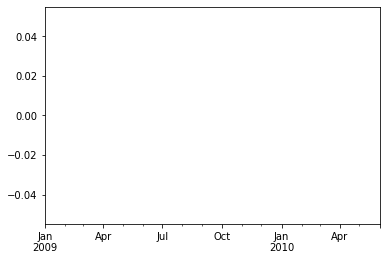

In [7]:
#test time chart
ts = pd.Series(df['PurchDate'].value_counts(), index=pd.date_range('1/1/2009', periods=517))

#ts = ts.cumsum()

ts.plot()

In [8]:
a = pd.Series(df['PurchDate'])
a

0        10/25/2010
1         5/27/2009
2         3/18/2010
3          6/8/2009
4          3/4/2009
            ...    
58381      3/9/2010
58382     1/26/2010
58383    10/28/2010
58384     12/1/2010
58385     10/8/2009
Name: PurchDate, Length: 58386, dtype: object

In [9]:
df.head()

RefId  IsBadBuy   PurchDate  ... VehBCost  IsOnlineSale  WarrantyCost
0    326         1  10/25/2010  ...   6100.0             0           533
1  42991         0   5/27/2009  ...   4000.0             0          1630
2  55273         0   3/18/2010  ...   7500.0             0           693
3  29058         0    6/8/2009  ...   4725.0             0          1633
4  34991         0    3/4/2009  ...   5670.0             0          1623

[5 rows x 34 columns]

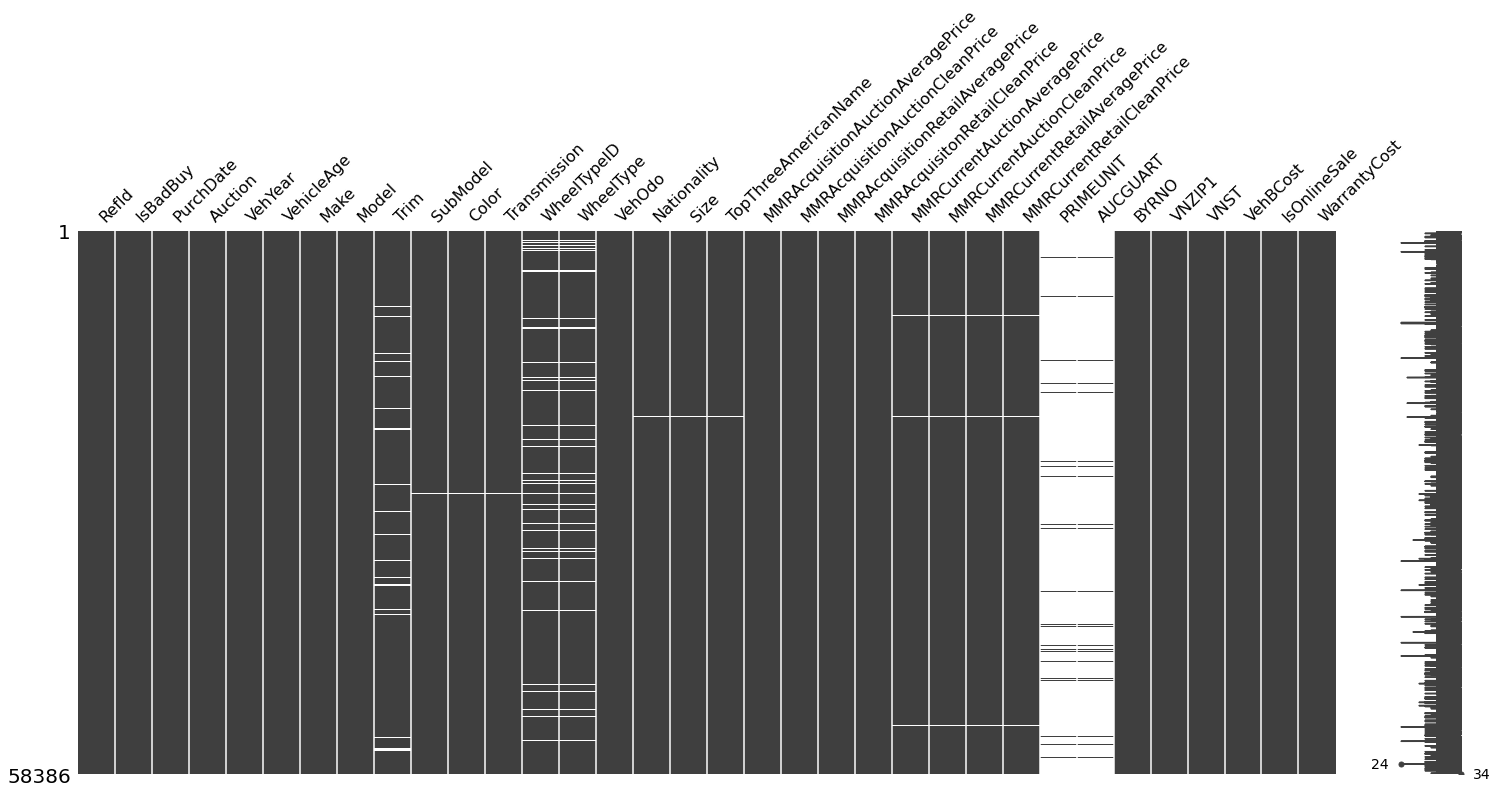

In [10]:
#Visualizzazione Missing Values

msno.matrix(df)

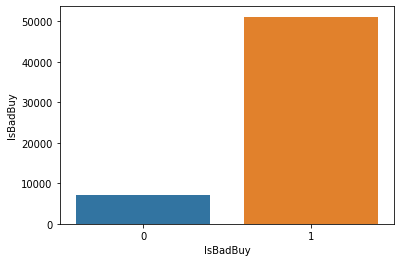

In [11]:
#visualizzazione variabile "IsBadBuy"

ax = sns.barplot(x = df["IsBadBuy"], y = df['IsBadBuy'].value_counts())

The types all seem right to me, considering that of the attributes that are int64 or float64, the only ones that make sense to average are all MMRs, VehBCost, WarrantyCost, and if you want vehOdo, vehYear and vehAge too. The others are all either counters (refId and BYRNO) or categories (all the others)

In [12]:
df.describe()

RefId      IsBadBuy  ...  IsOnlineSale  WarrantyCost
count  58386.000000  58386.000000  ...  58386.000000  58386.000000
mean   36567.888449      0.123454  ...      0.025674   1276.105042
std    21092.254801      0.328961  ...      0.158162    598.885423
min        1.000000      0.000000  ...      0.000000    462.000000
25%    18270.250000      0.000000  ...      0.000000    837.000000
50%    36608.500000      0.000000  ...      0.000000   1155.000000
75%    54811.500000      0.000000  ...      0.000000   1623.000000
max    73014.000000      1.000000  ...      1.000000   7498.000000

[8 rows x 19 columns]

NOT to use all the attributes as in this case but to filter only those for which the values ​​shown make sense

In [13]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentAuctionCleanPrice            245
MMRCurrentRetailAveragePrice           245
MMRCurrentRetailCleanPrice             245
PRIMEUNIT                            55703
AUCGUART                             55703
dtype: int64

In [14]:
# We do not  need col RefId
df.drop(columns=['RefId']).corr()

IsBadBuy  ...  WarrantyCost
IsBadBuy                           1.000000  ...      0.050259
VehYear                           -0.156926  ...     -0.267739
VehicleAge                         0.165325  ...      0.257996
WheelTypeID                       -0.047693  ...     -0.133688
VehOdo                             0.082858  ...      0.411273
MMRAcquisitionAuctionAveragePrice -0.105793  ...     -0.049682
MMRAcquisitionAuctionCleanPrice   -0.099315  ...     -0.019607
MMRAcquisitionRetailAveragePrice  -0.084514  ...     -0.053507
MMRAcquisitonRetailCleanPrice     -0.080712  ...     -0.026708
MMRCurrentAuctionAveragePrice     -0.106130  ...     -0.056893
MMRCurrentAuctionCleanPrice       -0.101036  ...     -0.028245
MMRCurrentRetailAveragePrice      -0.100786  ...     -0.058965
MMRCurrentRetailCleanPrice        -0.097195  ...     -0.032932
BYRNO                             -0.059412  ...     -0.089497
VNZIP1                             0.006393  ...     -0.039594
VehBCost                          -0.098132  ...     -0.033901
IsOnlineSale                      -0.003969  ...      0.006099
WarrantyCost                       0.050259  ...      1.000000

[18 rows x 18 columns]

removed purchDate, auction, Make, Model, Trim, SubModel, Color, Transmission, WheelType (kept id), Nationality, Size, TopThreeAmericanNames, VNST.

WarrantyCost and vehOdo: cars with many km -> insurance costs a lot -> (maybe) prob. bad buy? There is good correlation with all price related attributes. We need to spend some time later trying to derive some sensible variable from these values 

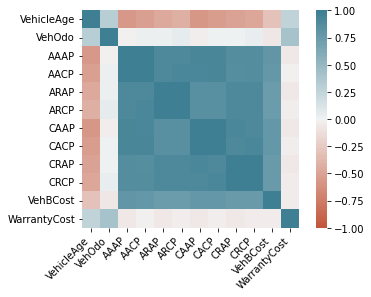

In [15]:
df.rename(columns={ 'MMRAcquisitionAuctionAveragePrice':'AAAP',
                    'MMRAcquisitionRetailAveragePrice':'ARAP',
                    'MMRCurrentAuctionAveragePrice':'CAAP',
                    'MMRCurrentRetailAveragePrice':'CRAP',
                    'MMRAcquisitionAuctionCleanPrice': 'AACP',
                    'MMRAcquisitonRetailCleanPrice': 'ARCP',
                    'MMRCurrentAuctionCleanPrice': 'CACP',
                    'MMRCurrentRetailCleanPrice': 'CRCP'
                  },inplace=True)

corr = df.drop(columns=['RefId',
        'VehYear',
        'IsBadBuy',
        'WheelTypeID',
        'BYRNO',
        'VNZIP1',
        'IsOnlineSale'],
        axis=1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
df.drop(columns=['RefId',
        'VehYear',
        'IsBadBuy',
        'WheelTypeID',
        'BYRNO',
        'VNZIP1',
        'IsOnlineSale'],
        axis=1).corr()

VehicleAge    VehOdo      AAAP  ...      CRCP  VehBCost  WarrantyCost
VehicleAge      1.000000  0.318778 -0.567106  ... -0.470640 -0.311903      0.257996
VehOdo          0.318778  1.000000 -0.018381  ...  0.046070 -0.064436      0.411273
AAAP           -0.567106 -0.018381  1.000000  ...  0.870424  0.789354     -0.049682
AACP           -0.519897  0.023717  0.990218  ...  0.870604  0.781123     -0.019607
ARAP           -0.462299  0.029107  0.910185  ...  0.905523  0.745718     -0.053507
ARCP           -0.427526  0.061407  0.909832  ...  0.906231  0.744622     -0.026708
CAAP           -0.576914 -0.030141  0.937482  ...  0.912305  0.778253     -0.056893
CACP           -0.533646  0.010755  0.931919  ...  0.921638  0.774637     -0.028245
CRAP           -0.505322  0.013719  0.871220  ...  0.989693  0.756790     -0.058965
CRCP           -0.470640  0.046070  0.870424  ...  1.000000  0.756551     -0.032932
VehBCost       -0.311903 -0.064436  0.789354  ...  0.756551  1.000000     -0.033901
WarrantyCost    0.257996  0.411273 -0.049682  ... -0.032932 -0.033901      1.000000

[12 rows x 12 columns]

Columns renamed with acronyms to try to understand something
+
Removed all "CleanPrice" columns

It can already be seen that the "VehicleAge" column is inversely correlated (approximately -0.6) with the price.

This makes a lot of sense as cars 🚗 lose value over the years. 😎

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

Text(0.5, 1.0, 'VehBCost')

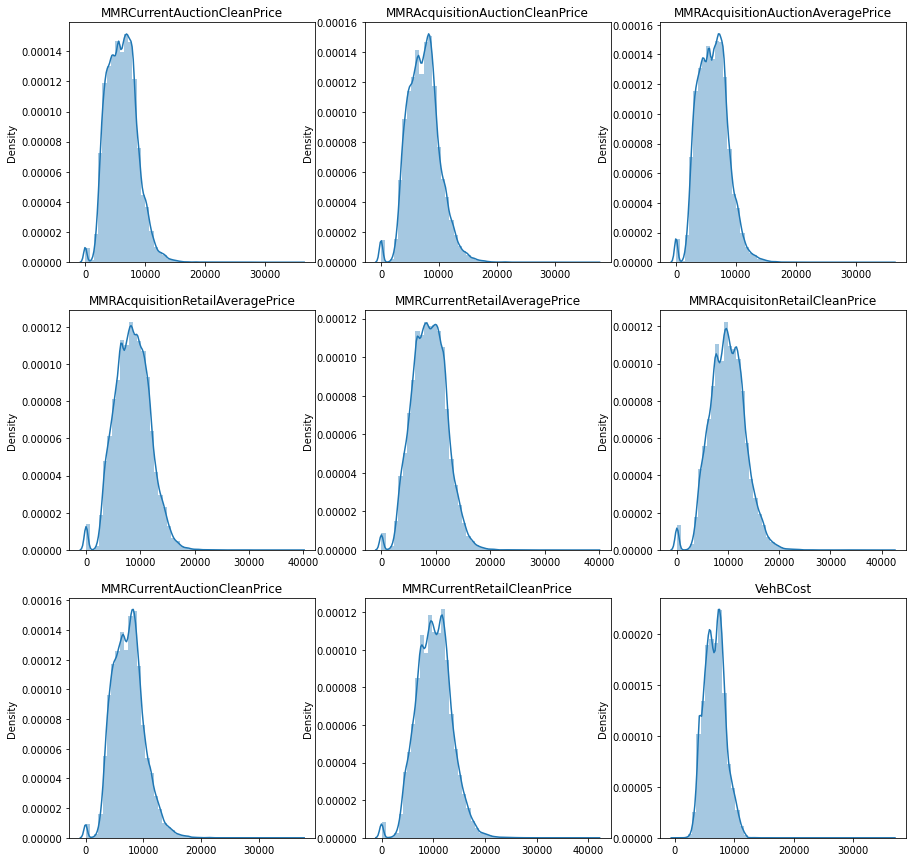

In [17]:
# load possible graphs
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 3)

plt.subplot2grid(fig_dims, (0, 0))
x = df[["CAAP"]].dropna()
sns.distplot(x);
plt.title('MMRCurrentAuctionCleanPrice')

plt.subplot2grid(fig_dims, (0, 1))
x = df[["AACP"]].dropna()
sns.distplot(x);
plt.title('MMRAcquisitionAuctionCleanPrice')

plt.subplot2grid(fig_dims, (0, 2))
x = df[["AAAP"]].dropna()
sns.distplot(x);
plt.title('MMRAcquisitionAuctionAveragePrice')


plt.subplot2grid(fig_dims, (1, 0))
x = df[["ARAP"]].dropna()
sns.distplot(x);
plt.title('MMRAcquisitionRetailAveragePrice')

plt.subplot2grid(fig_dims, (1, 1))
x = df[["CRAP"]].dropna()
sns.distplot(x);
plt.title('MMRCurrentRetailAveragePrice')

plt.subplot2grid(fig_dims, (1, 2))
x = df[["ARCP"]].dropna()
sns.distplot(x);
plt.title('MMRAcquisitonRetailCleanPrice')

plt.subplot2grid(fig_dims, (2, 0))
x = df[["CACP"]].dropna()
sns.distplot(x);
plt.title('MMRCurrentAuctionCleanPrice')

plt.subplot2grid(fig_dims, (2, 1))
x = df[["CRCP"]].dropna()
sns.distplot(x);
plt.title('MMRCurrentRetailCleanPrice')

plt.subplot2grid(fig_dims, (2, 2))
x = df[["VehBCost"]].dropna()
sns.distplot(x);
plt.title('VehBCost')

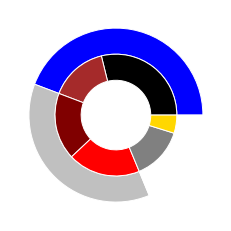

In [18]:
mostFreq = []
menoFreq = []
for i in df['Color']:
    if i == "SILVER" or i == "WHITE" or i == "BLUE":
        mostFreq.append(i)
    elif i != "OTHER" and i != "NOT AVAIL":
        menoFreq.append(i)
        
threeColors = Counter(mostFreq)
other = Counter(menoFreq)



fig, ax = plt.subplots()
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

outer_colors = threeColors
inner_colors = other

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.show()

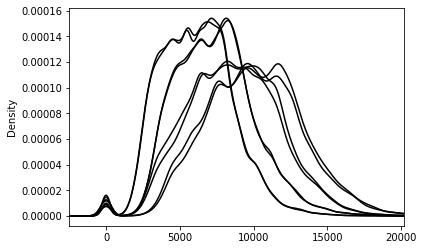

In [19]:
x = plt.xlim((-2500, 20200))
df["CAAP"].plot.kde(x = 'x', color = 'black') 
df['AACP'].plot.kde(x = 'x', color = 'black')
df['AAAP'].plot.kde(x = 'x', color = 'black')
df['ARAP'].plot.kde(x = 'x', color = 'black')
df['CRAP'].plot.kde(x = 'x', color = 'black')
df['ARCP'].plot.kde(x = 'x', color = 'black')
df['CACP'].plot.kde(x = 'x', color = 'black')
df['CRCP'].plot.kde(x = 'x', color = 'black')

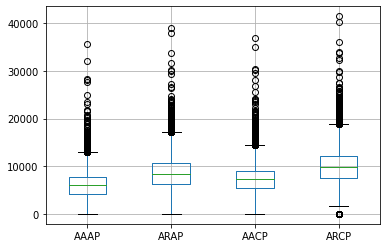

In [20]:
df.boxplot(column=['AAAP', 'ARAP', 'AACP', 'ARCP'])

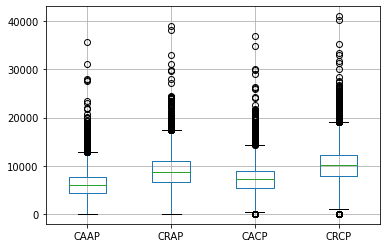

In [21]:
df.boxplot(column=['CAAP','CRAP','CACP','CRCP'])

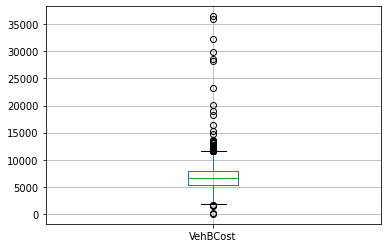

In [22]:
df.boxplot(column=['VehBCost'])

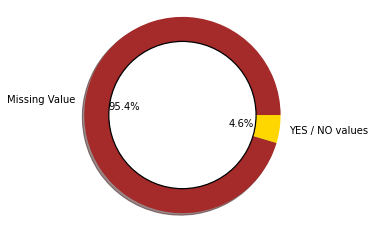

In [23]:
NaN = []
a = []

for i in df['PRIMEUNIT']:
    if i != 'YES' and i != 'NO':
        NaN.append(i)
    else:
        a.append(i)
        
NaN = len(NaN)
TOT = len(a)

labels = 'Missing Value', 'YES / NO values', 
sizes = [NaN, TOT]
colors = [ 'brown', 'gold']
explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

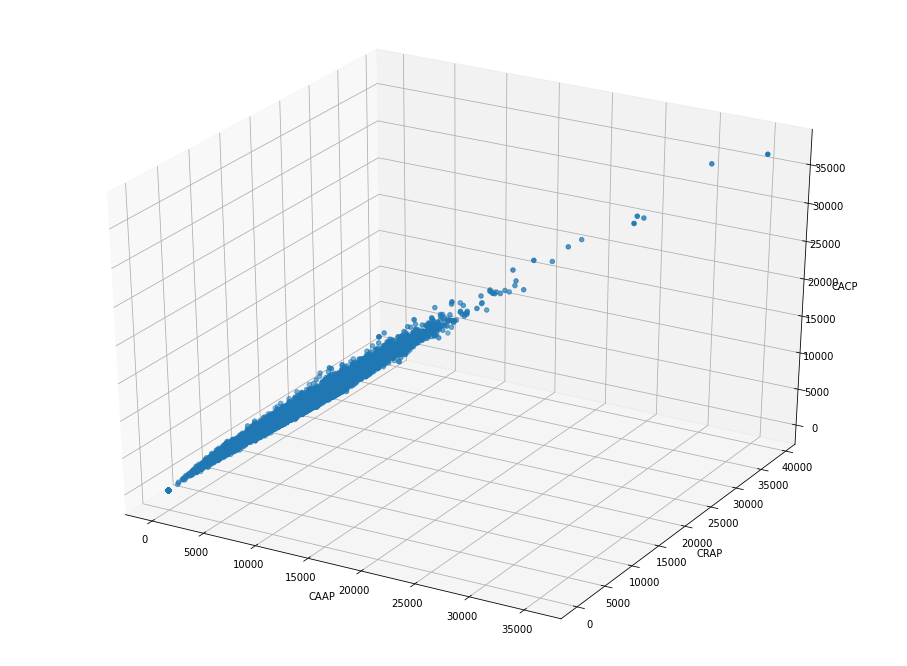

In [24]:
x = 'CAAP'
y = 'CRAP'
z = 'CACP'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df[x],
           df[y],
           df[z])
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [25]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x],
    y=df[y],
    z=df[z],
    mode='markers',
    marker=dict(
        size=2,
#        color=kmeans.labels_,                # set color to an array/list of desired values
#        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

Price / brand to try

In [26]:
pclass_xt = pd.crosstab(df['Transmission'], df['WheelType'])
pclass_xt

WheelType     Alloy  Covers  Special
Transmission                        
AUTO          27797   25432      539
MANUAL          937    1053       50

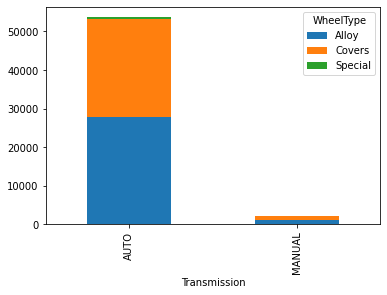

In [27]:
pclass_xt.plot(kind='bar', stacked=True)

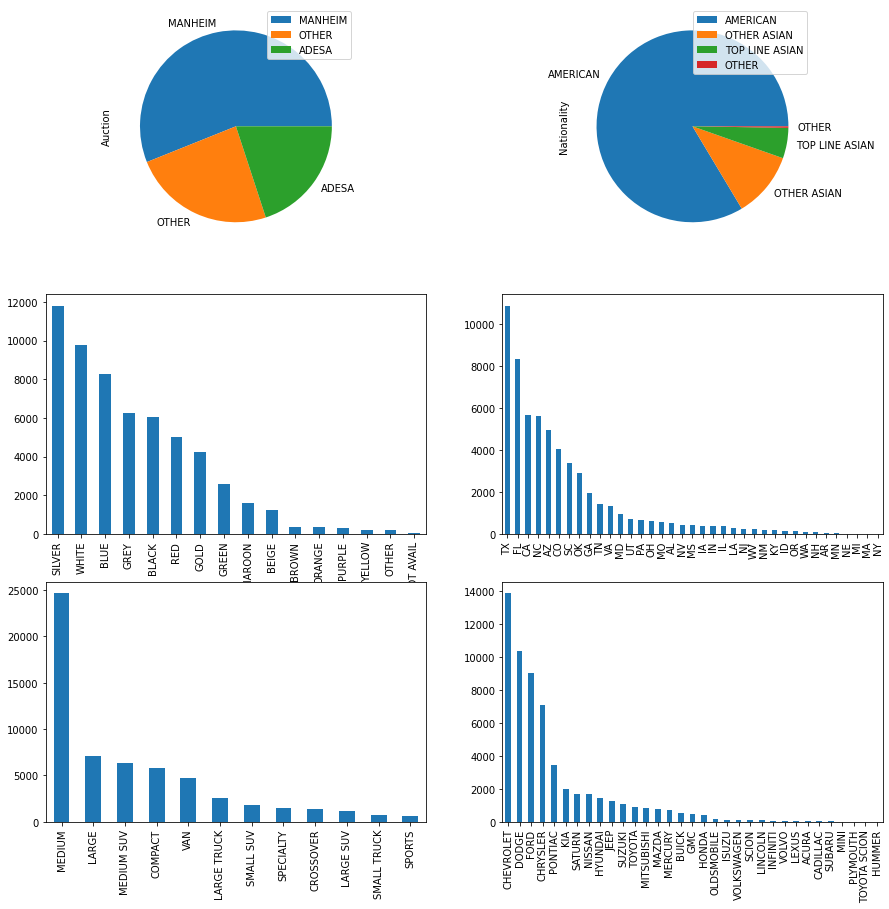

In [28]:
# load graphs, show datas
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['Auction'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (0, 1))
df['Nationality'].value_counts().plot.pie(legend=True)

plt.subplot2grid(fig_dims, (1, 0))
df['Color'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (1, 1))
df['VNST'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 0))
df['Size'].value_counts().plot(kind='bar')

plt.subplot2grid(fig_dims, (2, 1))
df['Make'].value_counts().plot(kind='bar')

In [29]:
df["IsOnlineSale"]

0        0
1        0
2        0
3        0
4        0
        ..
58381    0
58382    0
58383    0
58384    0
58385    0
Name: IsOnlineSale, Length: 58386, dtype: int64

In [30]:
df.apply(lambda x : 'refID'==326)

RefId                   False
IsBadBuy                False
PurchDate               False
Auction                 False
VehYear                 False
VehicleAge              False
Make                    False
Model                   False
Trim                    False
SubModel                False
Color                   False
Transmission            False
WheelTypeID             False
WheelType               False
VehOdo                  False
Nationality             False
Size                    False
TopThreeAmericanName    False
AAAP                    False
AACP                    False
ARAP                    False
ARCP                    False
CAAP                    False
CACP                    False
CRAP                    False
CRCP                    False
PRIMEUNIT               False
AUCGUART                False
BYRNO                   False
VNZIP1                  False
VNST                    False
VehBCost                False
IsOnlineSale            False
WarrantyCo

In [31]:
df['WheelTypeIDDelete'] = df['WheelTypeID'].fillna(4)

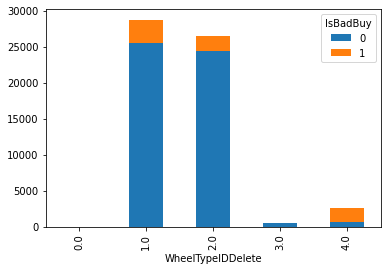

In [32]:
pclass_xt = pd.crosstab(df['WheelTypeIDDelete'], df['IsBadBuy'])
pclass_xt.plot(kind='bar', stacked=True)

# number of items where cost is <= 0

In [33]:
len(df[df['VehBCost'] <= 0])

0

In [34]:
len([(x, y) for x, y in zip(df['VehBCost'], df['ARCP']) if x > y and y != 0])

2919

2,919 machines were purchased at a higher price than the dealership. This also applies to cars bought as a basic option ('Bas' in the third column), and with high mileage. machines are also bought at a higher price than the dealer even if used. The only thing we have to understand is if there are also used cars in retail, and then all this is worth nothing. Initially I was hoping to use this as a check that the data was correct, however 

In [35]:
# verify the years are all correct
len([(y, a) for y, a in zip(df['VehYear'], df['VehicleAge']) if a+y < 2009 or a+y > 2010])

0

In [36]:
# number of elements, cars where the odometer is <= 0
len(df[df['VehOdo'] <= 0])

0

In [37]:
# number of items where the warranty cost is <= 0
len(df[df['WarrantyCost'] <= 0])

0

Now I verify that in any case, the purchase of a clean vehicle (above average condition) costs more than the average one (and in fact it is always perfect in any case

In [38]:
len([(x,y) for x,y in zip(df['AAAP'], df['AACP']) if x>y])

0

In [39]:
len([(x,y) for x,y in zip(df['ARAP'], df['ARCP']) if x>y])

0

In [40]:
len([(x,y) for x,y in zip(df['CAAP'], df['CACP']) if x>y])

0

In [41]:
len([(x,y) for x,y in zip(df['CRAP'], df['CRCP']) if x>y])

0

At this point I try to solve some missing values: All currentAuctions have about 250 missing values. I thought of replacing, when the medium ones are available, current with medium ones

In [42]:
# we have 245 missing values, and the one in line 292 is a missing value
print(df.at[292, 'CAAP'])
df['CAAP'].isnull().sum()

nan


245

In [43]:
# I have 13 missing values, which are the ones whose average value I also lack
df['CAAP'].fillna(df['AAAP'],inplace=True)
print(df['CAAP'].isnull().sum())
# Has successfully filled CAAP with the value in AAAP at id 292
print(df.at[292, 'CAAP'] == df.at[292, 'AAAP'])

13
True


In [44]:
# Now I have to do the same for the other current values
df['CRAP'].fillna(df['ARAP'],inplace=True)
df['CACP'].fillna(df['AACP'],inplace=True)
df['CRCP'].fillna(df['ARCP'],inplace=True)

Here in my opinion it is nice to point out that in general the bad buys are found in 3 areas

    On practically new cars (low odometer and low warranty cost)
    On used and risky cars (high guarantee, odometer around 40000-80000
    On used machines



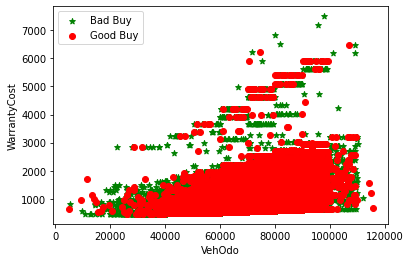

In [45]:
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['WarrantyCost'], color='g', marker='*', label='Bad Buy')
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['WarrantyCost'], color='r',label='Good Buy')
plt.xlabel('VehOdo')
plt.ylabel('WarrantyCost')
plt.legend()
plt.show()

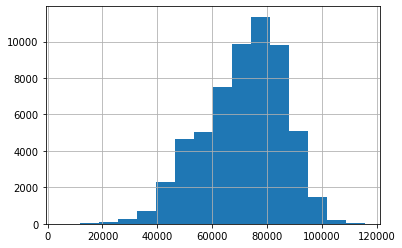

In [46]:
df['VehOdo'].hist(bins=16)
plt.show()

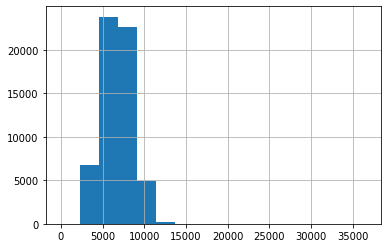

In [47]:
df['VehBCost'].hist(bins=16)
plt.show()

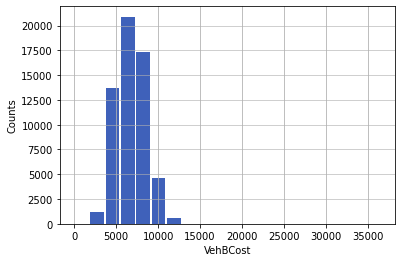

In [48]:
# Generate data on commute times.
size, scale = 1000, 10
commutes = df['VehBCost']

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#3f61ba')

plt.xlabel('VehBCost')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

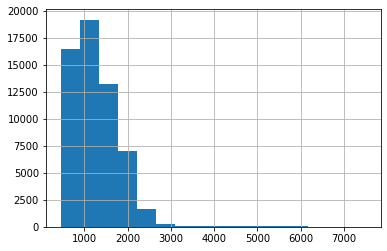

In [49]:
df['WarrantyCost'].hist(bins=16)
plt.show()

Variable Substitution & Redundancy Elimination

In [50]:
PAC = ['WA' ,'OR','AK','HI','CA']
MNT = ['MT' ,'WY','ID','NV','UT','CO','AZ','NM']
WNC = ['ND' ,'MN','SD','IA','NE','KS','MO']
WSC = ['OK' ,'AR','TX','LA']
ENC = ['WI' ,'MI','OH','IN','IL']
ESC = ['KY' ,'TN','MS','AL']
MAT = ['NY' ,'PA','NJ']
SAT = ['WV' ,'MD','DE','DC','VA','NC','SC','GA','FL']
NEN = ['ME' ,'NH','VT','MA','CT','RI']

In [51]:
sost = []
for i in df['VNST']:
    if i in PAC:
        sost.append('PAC')
    elif i in MNT:
        sost.append('MNT')
    elif i in WNC:
        sost.append('WNC')
    elif i in WSC:
        sost.append('WSC')
    elif i in ENC:
        sost.append('ENC')
    elif i in ESC:
        sost.append('ESC')
    elif i in MAT:
        sost.append('MAT')
    elif i in SAT:
        sost.append('SAT')
    elif i in NEN:
        sost.append('NEN')
    else:
        sost.append('XXX')

df['Region'] = sost

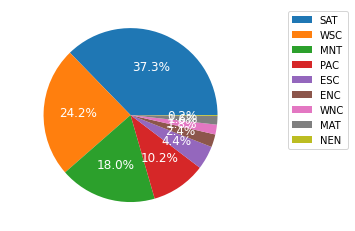

In [52]:
plot = df['Region'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

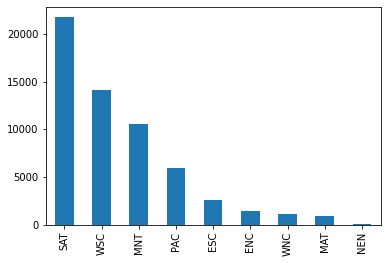

In [53]:
plot = df['Region'].value_counts().plot(kind='bar')

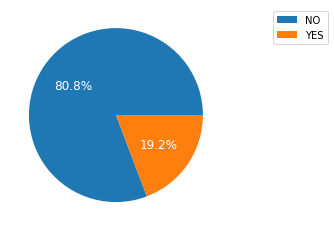

In [54]:
sost = []

for i in df['Trim']:
    if i == 'Bas':
        sost.append('YES')
    else:
        sost.append("NO")

df['IsBase'] = sost
plot = df['IsBase'].value_counts().plot.pie(legend=True,autopct='%1.1f%%',textprops=dict(color="w",size="12"))
plot.legend(bbox_to_anchor=(1.2,1), loc="upper left")
plot.axes.get_yaxis().set_visible(False)

In [55]:
df[['Trim']]

Trim
0       EX
1      SXT
2       SE
3        S
4      Bas
...    ...
58381   LS
58382  ZX4
58383   LS
58384  Bas
58385  Bas

[58386 rows x 1 columns]

In [56]:
df['IsBase'].isnull().sum()

0

Variable elimination (ideas)

    VehicleyEar
    Aucguart
    Primeunit

In [57]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                     1911
SubModel                    7
Color                       7
Transmission                8
WheelTypeID              2573
WheelType                2577
Nationality                 4
Size                        4
TopThreeAmericanName        4
AAAP                       13
AACP                       13
ARAP                       13
ARCP                       13
CAAP                       13
CACP                       13
CRAP                       13
CRCP                       13
PRIMEUNIT               55703
AUCGUART                55703
dtype: int64

To replace WheelType we realize that by grouping on IsBase we have different modes for the two groups

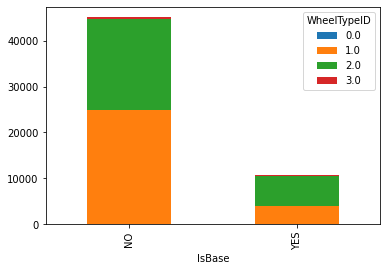

In [58]:
pclass_xt = pd.crosstab(df['IsBase'], df['WheelTypeID'])
pclass_xt.plot(kind='bar', stacked=True)

I replace all the missing values ​​of WheelType ID with the mode of the group relative to base trim or not: if the vehicle is not base then alloy is the mode (see graph above)

In [59]:
df['WheelTypeID'] = df.groupby(['IsBase']).WheelTypeID.apply(lambda x: x.fillna(x.mode()[0]))
df['WheelTypeID'].isnull().sum()

0

I do nothing with wheelType because in my opinion that attribute must be smoothed, so much is redundant with wheelTypeID

As for nationality, we realize that the missing values ​​are all American brands. So TopThreeAmericanName will be OTHER anyway, and nationality will be American

In [60]:
df[df['Nationality'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Nationality']]

TopThreeAmericanName Transmission           Model   Make Nationality
15769                  NaN         AUTO     SIERRA 1500    GMC         NaN
18532                  NaN         AUTO    NITRO 4WD V6  DODGE         NaN
20016                  NaN         AUTO  PATRIOT 2WD 4C   JEEP         NaN
35157                  NaN         AUTO  PATRIOT 2WD 4C   JEEP         NaN

In [61]:
df['TopThreeAmericanName'].fillna('OTHER', inplace=True)
df['TopThreeAmericanName'].isnull().sum()

0

In [62]:
df['Nationality'].fillna('OTHER', inplace=True)
df['Nationality'].isnull().sum()

0

Now we check the missing values ​​of transmission, and we notice that the distribution is much closer to the automatic transmission than to the manual one, so we use the mode. Furthermore, looking at the missing values ​​we notice that they are all American cars.

In [63]:
df[df['Transmission'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make']]

TopThreeAmericanName Transmission                 Model       Make
23019                   GM          NaN    IMPALA 3.4L V6 SFI  CHEVROLET
28280                 FORD          NaN  FREESTAR FWD V6 3.9L       FORD
28961                   GM          NaN   GRAND AM V6 3.4L V6    PONTIAC
33225                 FORD          NaN  MOUNTAINEER 2WD V8 4    MERCURY
35224             CHRYSLER          NaN  STRATUS V6 2.7L V6 M      DODGE
40504                 FORD          NaN   MONTEGO 3.0L V6 EFI    MERCURY
48641             CHRYSLER          NaN  STRATUS V6 2.7L V6 M      DODGE
50661                   GM          NaN  S10 PICKUP 2WD 4C 2.  CHEVROLET

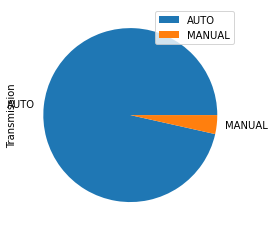

In [64]:
df['Transmission'].value_counts().plot.pie(legend=True)

In [65]:
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Transmission'].isnull().sum()

0

As for the color, I tried to group on the significant attributes (make, size, year), but whatever the fashion was always SILVER.

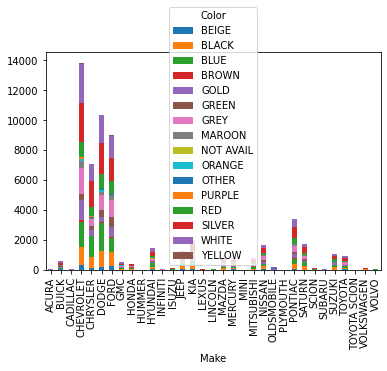

In [66]:
pclass_xt = pd.crosstab(df['Make'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

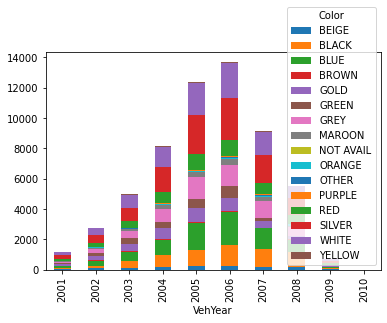

In [67]:
pclass_xt = pd.crosstab(df['VehYear'], df['Color'])
pclass_xt.plot(kind='bar', stacked=True)

In [68]:
df[df['Color'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

TopThreeAmericanName Transmission                 Model       Make Color
23019                   GM         AUTO    IMPALA 3.4L V6 SFI  CHEVROLET   NaN
28280                 FORD         AUTO  FREESTAR FWD V6 3.9L       FORD   NaN
28961                   GM         AUTO   GRAND AM V6 3.4L V6    PONTIAC   NaN
33225                 FORD         AUTO  MOUNTAINEER 2WD V8 4    MERCURY   NaN
35224             CHRYSLER         AUTO  STRATUS V6 2.7L V6 M      DODGE   NaN
48641             CHRYSLER         AUTO  STRATUS V6 2.7L V6 M      DODGE   NaN
50661                   GM         AUTO  S10 PICKUP 2WD 4C 2.  CHEVROLET   NaN

In [69]:
#I replace with fashion that is silver
df['Color'].fillna(df['Color'].mode()[0], inplace=True) 
df['Color'].isnull().sum()

0

Now size, I have noticed that different brands have different distributions, so we group on make and take the fashion

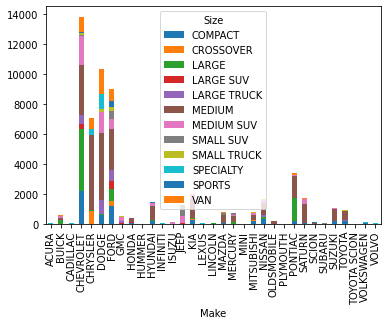

In [70]:
pclass_xt = pd.crosstab(df['Make'], df['Size'])
pclass_xt.plot(kind='bar', stacked=True)

In [71]:
df[df['Size'].isnull()][['TopThreeAmericanName', 'Transmission', 'Model', 'Make', 'Color']]

TopThreeAmericanName Transmission           Model   Make   Color
15769                OTHER         AUTO     SIERRA 1500    GMC   WHITE
18532                OTHER         AUTO    NITRO 4WD V6  DODGE   WHITE
20016                OTHER         AUTO  PATRIOT 2WD 4C   JEEP  SILVER
35157                OTHER         AUTO  PATRIOT 2WD 4C   JEEP   BLACK

In [72]:
df['Size'] = df.groupby(['Make']).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['Size'].isnull().sum()

0

Sub model is weird, I thought I'd group on make and model, and take the fashion of that

In [73]:
df[df['SubModel'].isnull()][['TopThreeAmericanName', 'Nationality', 'Model', 'Make', 'SubModel']]

TopThreeAmericanName Nationality  ...       Make SubModel
23019                   GM    AMERICAN  ...  CHEVROLET      NaN
28280                 FORD    AMERICAN  ...       FORD      NaN
28961                   GM    AMERICAN  ...    PONTIAC      NaN
33225                 FORD    AMERICAN  ...    MERCURY      NaN
35224             CHRYSLER    AMERICAN  ...      DODGE      NaN
48641             CHRYSLER    AMERICAN  ...      DODGE      NaN
50661                   GM    AMERICAN  ...  CHEVROLET      NaN

[7 rows x 5 columns]

In [74]:
df['SubModel'] = df.groupby([df['Make'], df['Model']]).Size.apply(lambda x: x.fillna(x.mode()[0]))
df['SubModel'].isnull().sum()

0

In [75]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim          1911
WheelType     2577
AAAP            13
AACP            13
ARAP            13
ARCP            13
CAAP            13
CACP            13
CRAP            13
CRCP            13
PRIMEUNIT    55703
AUCGUART     55703
dtype: int64

Perfect, at this point no missing value remained. We just have to insert the variable (s) to add for the averages, remove the useless ones

In [76]:
df.sort_values(['VehBCost'])['VehBCost'].head()

40998       1.0
53937     225.0
26371    1400.0
31167    1620.0
26693    1720.0
Name: VehBCost, dtype: float64

Here I remove all the elements for which all the elements are at 0 and check that there are no elements of which all the Auctions (XAXX) are at 0 and all the Retail (XRXX). I also eliminate the 2/3 outliers of VehBCost

In [77]:
tresh = 1000
to_delete = df[(df['AAAP'] < tresh) &
   (df['AACP'] < tresh) &
   (df['ARAP'] < tresh) &
   (df['ARCP'] < tresh) &
   (df['CAAP'] < tresh) &
   (df['CACP'] < tresh) &
   (df['CRAP'] < tresh) &
   (df['CRCP'] < tresh)].index.tolist()
print(len(to_delete))

auction_delete = df[(df['AAAP'] < tresh) &
   (df['AACP'] < tresh) &
   (df['CAAP'] < tresh) &
   (df['CACP'] < tresh)].index.tolist()

retail_delete = df[(df['CRAP'] < tresh) &
   (df['CRCP'] < tresh) &
   (df['ARAP'] < tresh) &
   (df['ARCP'] < tresh)].index.tolist()
print(len(auction_delete))
print(len(retail_delete))

to_delete += auction_delete + retail_delete
to_delete = list(dict.fromkeys(to_delete))
print(len(to_delete))

print(df['VehBCost'].sort_values().head())

to_delete.append(40998)
to_delete.append(53937)

new_df = df.drop(index=to_delete)
df['RefId'].count() - new_df['RefId'].count()
(df.iloc[to_delete])[df['IsBadBuy'] == 1]['RefId'].count()

358
358
358
358
40998       1.0
53937     225.0
26371    1400.0
31167    1620.0
26693    1720.0
Name: VehBCost, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



47

In [78]:
new_df.drop(columns=['RefId',
    'VehYear',
    'IsBadBuy',
    'WheelTypeID',
    'BYRNO',
    'VNZIP1',
    'IsOnlineSale'],
    axis=1).corr()

VehicleAge    VehOdo  ...  WarrantyCost  WheelTypeIDDelete
VehicleAge           1.000000  0.319951  ...      0.261437          -0.146062
VehOdo               0.319951  1.000000  ...      0.412337          -0.133738
AAAP                -0.581860 -0.018997  ...     -0.047300          -0.088766
AACP                -0.535744  0.024146  ...     -0.016182          -0.112936
ARAP                -0.476445  0.029737  ...     -0.051085          -0.071401
ARCP                -0.442707  0.063149  ...     -0.023263          -0.092310
CAAP                -0.592578 -0.032584  ...     -0.055165          -0.083545
CACP                -0.550261  0.009794  ...     -0.025255          -0.107460
CRAP                -0.521685  0.012803  ...     -0.056850          -0.075680
CRCP                -0.487965  0.046630  ...     -0.029583          -0.095960
VehBCost            -0.312975 -0.064702  ...     -0.034867          -0.136114
WarrantyCost         0.261437  0.412337  ...      1.000000          -0.085738
WheelTypeIDDelete   -0.146062 -0.133738  ...     -0.085738           1.000000

[13 rows x 13 columns]

In [79]:
sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

Trim          1908
WheelType     2553
AAAP            13
AACP            13
ARAP            13
ARCP            13
CAAP            13
CACP            13
CRAP            13
CRCP            13
PRIMEUNIT    55346
AUCGUART     55346
dtype: int64

In [80]:
new_df.drop(columns=['Trim', 'WheelType', 'PRIMEUNIT', 'AUCGUART', 'VehYear', 'VNZIP1', 'VNST', 'WheelTypeIDDelete'], inplace=True)

sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

AAAP    13
AACP    13
ARAP    13
ARCP    13
CAAP    13
CACP    13
CRAP    13
CRCP    13
dtype: int64

In [81]:
new_df.dropna(inplace=True)

sum_ = new_df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

Three new variables are inserted below:

    AuctionAVG: This is an average of all available values ​​with Auction in the name (XAXX). I had previously removed the ones that were all <of the threshold, so I expect to have at least one element to average on
    RetailAVG: It is an average of all the values ​​available with Retail in the name (XRXX). Same speech as before
    Trend: It is a number that increases in module the higher is the difference between average and current. If current> average then trend is positive, otherwise negative. If I have no value for current or no value for average available, the trend is 0

At the end I print 4 values ​​in 5 lines. The i-th line reads as:

"number of XAXX (average) of which I found only filled lines, same thing as XCXX, same thing as AXXX, same thing as CXXX"

In [82]:
sost_auct = []
sost_ret = []
prova_auc = []
prova_ret = []
prova_acquis = []
prova_current = []
trend =  []

for i, row in new_df.iterrows():
    n_ret = 0
    n_auc = 0
    n_acquis = 0
    n_current = 0
    retail = 0
    current = 0
    acquis = 0
    auction = 0
    # auction
    if row['AAAP'] >= tresh:
        n_auc = n_auc + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['AAAP']
        auction = auction + row['AAAP']
    if row['AACP'] >= tresh:
        n_auc = n_auc + 1
        n_acquis = n_acquis + 1
        auction = auction + row['AACP']
        acquis = acquis + row['AACP']
    if row['CAAP'] >= tresh:
        n_auc = n_auc + 1
        n_current = n_current + 1
        current = current + row['CAAP']
        auction = auction + row['CAAP']
    if row['CACP'] >= tresh:
        n_auc = n_auc + 1
        n_current = n_current + 1
        current = current + row['CACP']
        auction = auction + row['CACP']
    #retail
    if row['ARAP'] >= tresh:
        n_ret = n_ret + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['ARAP']
        retail = retail + row['ARAP']
    if row['ARCP'] >= tresh:
        n_ret = n_ret + 1
        n_acquis = n_acquis + 1
        acquis = acquis + row['ARCP']
        retail = retail + row['ARCP']
    if row['CRAP'] >= tresh:
        n_ret = n_ret + 1
        n_current = n_current + 1
        current = current + row['CRAP']
        retail = retail + row['CRAP']
    if row['CRCP'] >= tresh:
        n_ret = n_ret + 1
        n_current = n_current + 1
        current = current + row['CRCP']
        retail = retail + row['CRCP']
        
    sost_auct.append((auction / n_auc))
    sost_ret.append((retail / n_ret))
    
    if n_acquis == 0 or n_current == 0:
        trend.append(0)
    else:
        a = (current - acquis) / (current + acquis)
        trend.append(a)
    
    prova_auc.append(n_auc)
    prova_ret.append(n_ret)
    prova_acquis.append(n_acquis)
    prova_current.append(n_current)
        
new_df['AuctionAVG'] = sost_auct
new_df['RetailAVG'] = sost_ret
new_df['Trend'] = trend

for i in range (0,5):
    print(prova_auc.count(i), " " , prova_ret.count(i), " ", prova_acquis.count(i), " " , prova_current.count(i))

0   0   290   38
0   0   0   3
332   328   0   0
12   3   2   12
57669   57682   57721   57960


In [83]:
# distribuzione di goodBuy vs badBuy
a = new_df[new_df['IsBadBuy']== 0]['RefId'].count()
b = new_df[new_df['IsBadBuy']== 1]['RefId'].count() 
(a*100)/(a+b)

87.65621498629618

In [84]:
new_df.head()

RefId  IsBadBuy   PurchDate  Auction  ...  IsBase AuctionAVG RetailAVG     Trend
0    326         1  10/25/2010    ADESA  ...      NO     7128.5   10300.0 -0.012594
1  42991         0   5/27/2009  MANHEIM  ...      NO     5970.5    6948.0  0.000000
2  55273         0   3/18/2010    OTHER  ...      NO     8061.5   11199.0 -0.022092
3  29058         0    6/8/2009    OTHER  ...      NO     5737.5    6696.5  0.000000
4  34991         0    3/4/2009  MANHEIM  ...     YES     6061.0    7046.0  0.004692

[5 rows x 32 columns]

In [85]:
new_df.drop(columns=['AAAP', 'AACP', 'CAAP', 'CACP', 'ARAP', 'ARCP', 'CRAP', 'CRCP'], inplace=True)

In [86]:
for col in new_df.columns:
    print(col)

RefId
IsBadBuy
PurchDate
Auction
VehicleAge
Make
Model
SubModel
Color
Transmission
WheelTypeID
VehOdo
Nationality
Size
TopThreeAmericanName
BYRNO
VehBCost
IsOnlineSale
WarrantyCost
Region
IsBase
AuctionAVG
RetailAVG
Trend


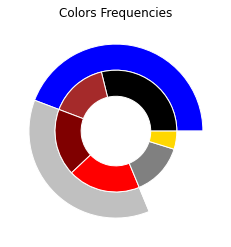

In [87]:
mostFreq = []
menoFreq = []
for i in new_df['Color']:
    if i == "SILVER" or i == "WHITE" or i == "BLUE":
        mostFreq.append(i)
    elif i != "OTHER" and i != "NOT AVAIL":
        menoFreq.append(i)
        
threeColors = Counter(mostFreq)
other = Counter(menoFreq)



fig, ax = plt.subplots()
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

outer_colors = threeColors
inner_colors = other

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Colors Frequencies')
plt.show()

#Two variables in comparison:
# - AuctionAVG in the new dataframe after modification
# - AAAP old Dataframe before modification

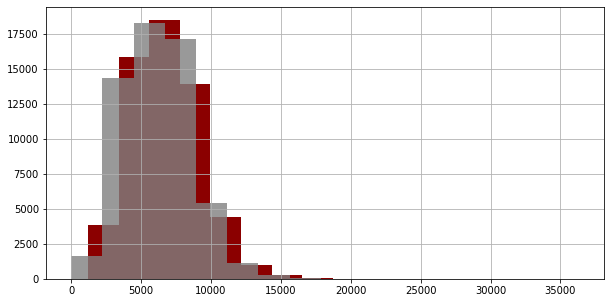

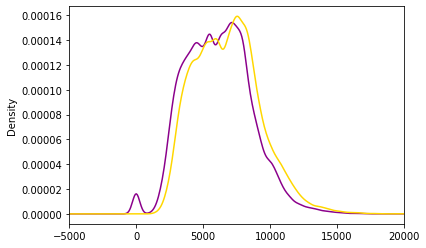

In [88]:
fig = plt.figure(figsize=(10, 5)) 

new_df['AuctionAVG'].hist(bins=16, color= 'darkred' )
df['AAAP'].hist(bins=16, color = 'grey', alpha=0.8)
plt.show()

#OR

x = plt.xlim((-5000, 20000))
df["AAAP"].plot.kde(x = 'x', color = 'darkmagenta') 
new_df['AuctionAVG'].plot.kde (x = 'x', color = 'gold')

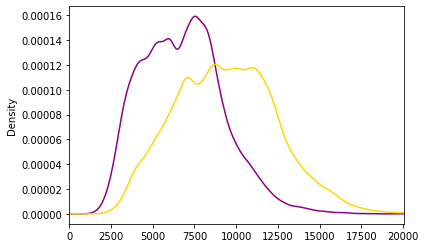

In [89]:
x = plt.xlim((0, 20050))
new_df["AuctionAVG"].plot.kde(x = 'x', color = 'darkmagenta') 
new_df['RetailAVG'].plot.kde(x = 'x', color = 'gold')

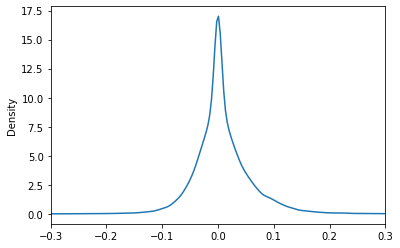

In [90]:
x = plt.xlim((-0.3, 0.3))

new_df["Trend"].plot.kde(x = 'x') 

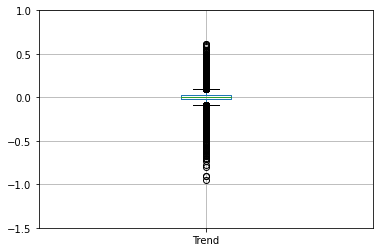

In [91]:
plt.ylim((-1.5, 1))

new_df.boxplot(column=['Trend'])

THINGS TO DO:

    graphically represent Odometer
    Graph the Trend variable
    Trim: double check 

In [92]:
len(new_df[new_df['Trend'] == 0.0])

7075

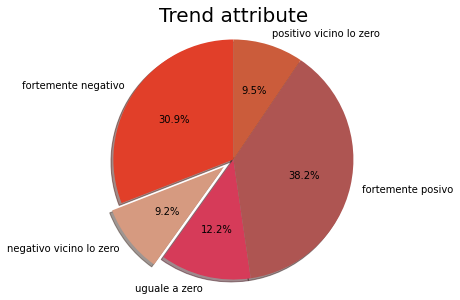

In [93]:
primo = []
secondo = []
zero = []
primoAlto = []
secondoAlto = []

for i in new_df['Trend']:
    if i < -0.01:
        primo.append(i)
    elif i < 0:
        primoAlto.append(i)
    elif i == 0:
        zero.append(i)
    elif i < 0.01:
        secondoAlto.append(i)
    else:
        secondo.append(i)


primo = len(primo)
primoAlto = len(primoAlto)
zero = len(zero)
secondo = len(secondo)
secondoAlto= len(secondoAlto)

# Pie chart
labels = ['fortemente negativo','negativo vicino lo zero', 'uguale a zero','fortemente posivo','positivo vicino lo zero']
sizes = [primo, primoAlto, zero, secondo, secondoAlto]# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0, 0) #add colors
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Trend attribute', fontsize=20)
plt.show()

#change colors

In [94]:
len(new_df[new_df['Trend'] < 0]) - len(new_df[new_df['Trend'] < -0.01])

5339

CLUSTERING KMeans Evaluation

In [101]:
df_clus = df[['VehBCost', 'WarrantyCost', 'VehOdo']]

In [102]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_clus.values)

In [104]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
res = KMeans(n_clusters=6).fit(scaled_df)

In [105]:
x_ = 'VehBCost'
y_ = 'WarrantyCost'
z_ = 'VehOdo'

In [106]:
centers = scaler.inverse_transform(res.cluster_centers_)
print(centers)

[[ 6667.4743048    961.82548118 64373.89571962]
 [ 6525.26881726  1898.59360406 88251.31025381]
 [ 5306.51111111  4687.36767677 77301.43232323]
 [ 7271.98834031  1658.03245921 73292.83531221]
 [ 6448.31583275   982.98809803 82511.46151437]
 [ 6817.62885673   843.29183525 47478.46830584]]


In [107]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x_],
    y=df[y_],
    z=df[z_],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x_,
                     yaxis_title= y_,
                     zaxis_title= z_)
                 )
fig.show()

In [108]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x_],
    y=df[y_],
    z=df[z_],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x_,
                     yaxis_title= y_,
                     zaxis_title= z_)
                 )
fig.show()

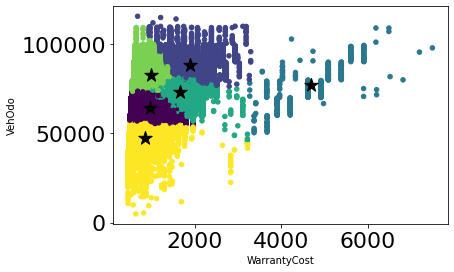

In [109]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehOdo'], c=res.labels_, 
            s=20)
plt.scatter(centers[:, 1], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('WarrantyCost')
plt.ylabel('VehOdo')
plt.show()

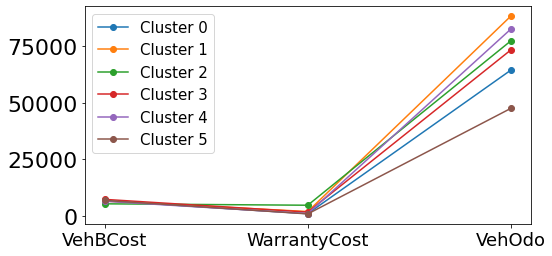

In [110]:
plt.figure(figsize=(8, 4))
col = df_clus.columns
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [111]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = res.labels_

In [112]:
bad = []
good = []
for i in range (0,6):
  points = df.iloc[np.where(res.labels_==i)]
  bad.append(len(points[points['IsBadBuy'] == 1]))
  good.append(len(points[points['IsBadBuy'] == 0]))
labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

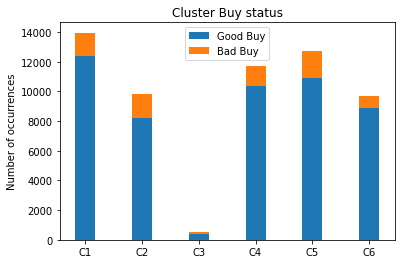

In [113]:
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, good, width)
p2 = plt.bar(ind, bad, width,
             bottom=good)

plt.ylabel('Number of occurrences')
plt.title('Cluster Buy status')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 15000, 2000))
plt.legend((p1[0], p2[0]), ('Good Buy', 'Bad Buy'))

plt.show()

KMeans

In [114]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [139]:
df = pd.read_csv('/content/DATA/training_cleansed.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

IsBadBuy   PurchDate  Auction  ...  VehBCost  IsOnlineSale WarrantyCost
0         1  10/25/2010    ADESA  ...    6100.0             0          533
1         0   5/27/2009  MANHEIM  ...    4000.0             0         1630
2         0   3/18/2010    OTHER  ...    7500.0             0          693
3         0  06/08/2009    OTHER  ...    4725.0             0         1633
4         0  03/04/2009  MANHEIM  ...    5670.0             0         1623

[5 rows x 33 columns]

In [140]:
for e in df.columns:
  print(e)

IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelTypeID
WheelType
VehOdo
Nationality
Size
TopThreeAmericanName
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
PRIMEUNIT
AUCGUART
BYRNO
VNZIP1
VNST
VehBCost
IsOnlineSale
WarrantyCost


In [141]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Trim                     1911
SubModel                    7
Color                       7
Transmission                8
WheelTypeID              2573
WheelType                2577
Nationality                 4
Size                        4
TopThreeAmericanName        4
AAAP                       13
AACP                       13
ARAP                       13
ARCP                       13
CAAP                      245
CACP                      245
CRAP                      245
CRCP                      245
PRIMEUNIT               55703
AUCGUART                55703
dtype: int64

In [142]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo']]
df_clus = df_clus[0:20000]

In [143]:
df_clus.corr()

AAAP      AACP      ARAP  ...  VehBCost  WarrantyCost    VehOdo
AAAP          1.000000  0.990273  0.909891  ...  0.791432     -0.057132 -0.029781
AACP          0.990273  1.000000  0.901995  ...  0.783276     -0.028159  0.011106
ARAP          0.909891  0.901995  1.000000  ...  0.747464     -0.057880  0.018373
ARCP          0.909642  0.917761  0.990045  ...  0.746672     -0.031678  0.049887
CAAP          0.939290  0.925213  0.852640  ...  0.780454     -0.061181 -0.040494
CACP          0.933235  0.933149  0.849360  ...  0.775744     -0.033426 -0.000393
CRAP          0.870611  0.859571  0.913406  ...  0.758007     -0.060825  0.002163
CRCP          0.869744  0.870157  0.905811  ...  0.757303     -0.033879  0.034119
VehBCost      0.791432  0.783276  0.747464  ...  1.000000     -0.039219 -0.075337
WarrantyCost -0.057132 -0.028159 -0.057880  ... -0.039219      1.000000  0.402873
VehOdo       -0.029781  0.011106  0.018373  ... -0.075337      0.402873  1.000000

[11 rows x 11 columns]

In [144]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'AAAP']]
df_2 = df_clus[['WarrantyCost', 'VehBCost', 'AAAP']]
df_3 = df_clus[['AAAP', 'ARAP', 'VehBCost']]
df_4 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_5 = df_clus[['WarrantyCost', 'AAAP', 'VehOdo']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

K-Means with MinMax

In [145]:
scaler = MinMaxScaler()
z_scaled_df = []
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [148]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)
df.fillna(-99999, inplace=True)

In [150]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [152]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [153]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [161]:
df[:] = np.nan_to_num(df)
df.isnull().sum()

IsBadBuy                0
PurchDate               0
Auction                 0
VehYear                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
SubModel                0
Color                   0
Transmission            0
WheelTypeID             0
WheelType               0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
AAAP                    0
AACP                    0
ARAP                    0
ARCP                    0
CAAP                    0
CACP                    0
CRAP                    0
CRCP                    0
PRIMEUNIT               0
AUCGUART                0
BYRNO                   0
VNZIP1                  0
VNST                    0
VehBCost                0
IsOnlineSale            0
WarrantyCost            0
dtype: int64

In [155]:
to_plot_idx = 3
to_plot = data_frames[to_plot_idx]
lab = []
for e in to_plot.columns:
  lab.append(e)
x = lab[0]
y = lab[1]
z = lab[2]
k_plot = 6

IndexError: ignored

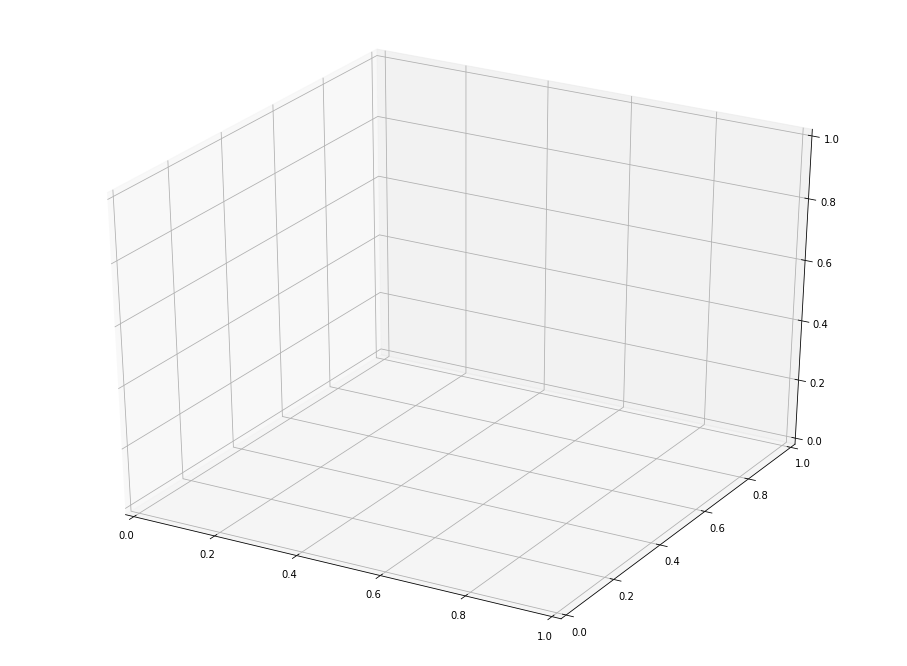

In [156]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=results[str(to_plot_idx)][k_plot-2].labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

CLUSTERING Hierarchical

In [162]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [163]:
df.drop(df.columns[0], axis=1, inplace=True)

In [164]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo']]
df_clus = df_clus[0:20000]

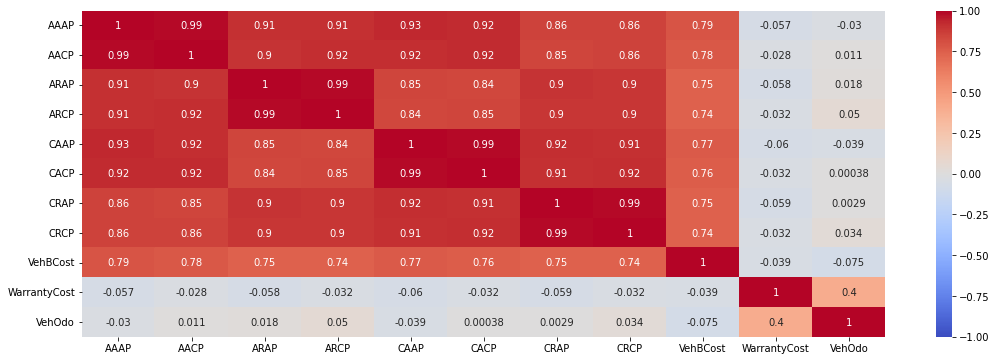

In [165]:
corr=df_clus.corr()
plt.subplots(figsize =(18,6))
ax = plt.axes()

sns.heatmap(corr, ax = ax,
                xticklabels=corr.columns.values, annot=True,
                yticklabels=corr.columns.values, cmap="coolwarm", vmax=1, vmin=-1)

In [166]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'AAAP']]
df_2 = df_clus[['WarrantyCost', 'VehBCost', 'VehOdo']]

In [167]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_2.values)

In [168]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [169]:
from sklearn.cluster import AgglomerativeClustering

In [170]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 11):
  for l in linkages:
    for metr in metrics:
      if l == 'ward' and metr != 'euclidean':
        continue
      res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(scaled_df)
      results.append({
        'res': res,
        'k': k,
        'silu': silhouette_score(scaled_df, res.labels_, metric = metr),
        'link': l,
        'metric': metr
      })
  print("end k = ", k)

end k =  2
end k =  3
end k =  4
end k =  5
end k =  6
end k =  7
end k =  8
end k =  9
end k =  10


In [171]:
plot_res = next(x['res'] for x in results if x['k'] == 6 and x['metric'] == 'euclidean' and x['link'] == 'ward')

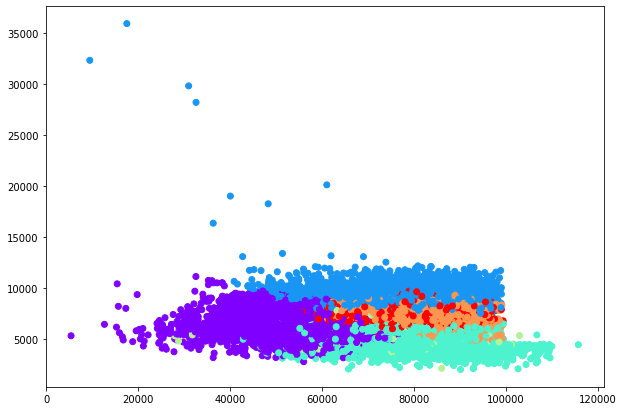

In [172]:
plt.figure(figsize=(10, 7))
plt.scatter(df_2['VehOdo'], df_2['VehBCost'], c=plot_res.labels_, cmap='rainbow')

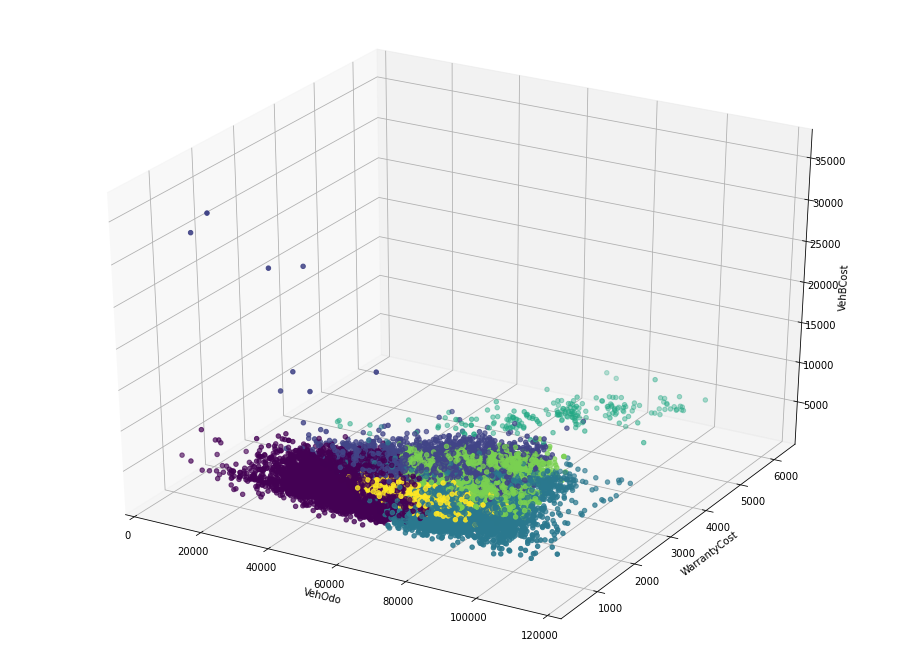

In [173]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_2['VehOdo'],
           df_2['WarrantyCost'],
           df_2['VehBCost'],
           c=plot_res.labels_, marker='o')
ax.set_xlabel('VehOdo')
ax.set_ylabel('WarrantyCost')
ax.set_zlabel('VehBCost')
plt.show()

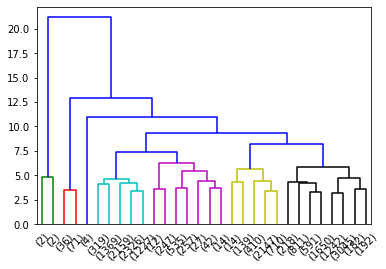

In [174]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=7, truncate_mode='lastp')

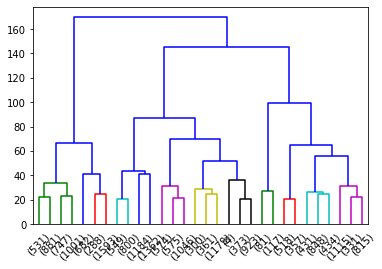

In [175]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=40, truncate_mode='lastp')

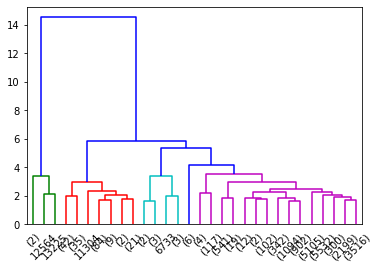

In [176]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=4, truncate_mode='lastp')

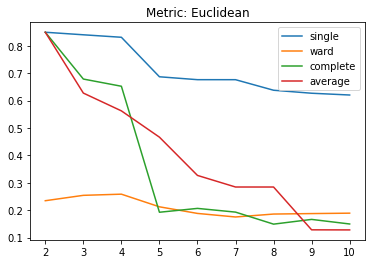

In [177]:
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean')

ax.legend()

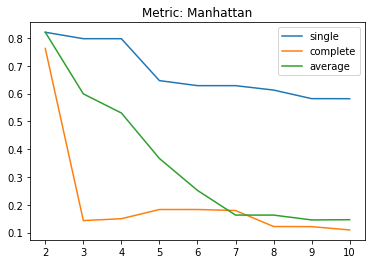

In [178]:
x = range(2, 11)
fig, ax = plt.subplots()
y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'manhattan']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'manhattan']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'manhattan']

ys = [y1, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Manhattan')

ax.legend()

CLUSTERING Hierarchical EVALUATION

In [202]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [203]:
df = pd.read_csv('/content/DATA/training_cleansed.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [204]:
df_clus = df[['WarrantyCost', 'VehBCost', 'VehOdo']]
df_clus = df_clus[0:20000]

In [205]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_clus.values)

In [206]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [207]:
reseuc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(scaled_df)
resman = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete').fit(scaled_df)

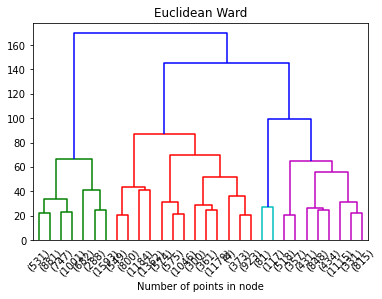

In [208]:
plt.title('Euclidean Ward')
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
dendrogram(data_link, color_threshold=88, truncate_mode='lastp')
plt.xlabel("Number of points in node")
plt.show()

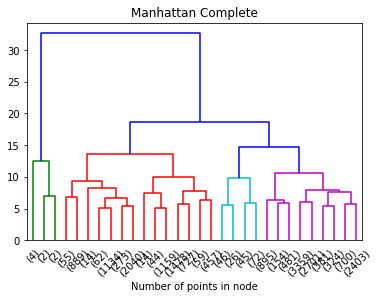

In [209]:
plt.title('Manhattan Complete')
data_dist = pdist(scaled_df, metric='cityblock')
data_link = linkage(data_dist, method='complete', metric='manhattan')
dendrogram(data_link, color_threshold=14, truncate_mode='lastp')
plt.xlabel("Number of points in node")
plt.show()

In [210]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_clus.index.values
cluster_map['cluster'] = reseuc.labels_

In [211]:
bad = []
good = []
for i in range (0,4):
  points = df.iloc[np.where(reseuc.labels_==i)]
  bad.append(len(points[points['IsBadBuy'] == 1]))
  good.append(len(points[points['IsBadBuy'] == 0]))
labels = ['C1', 'C2', 'C3', 'C4']

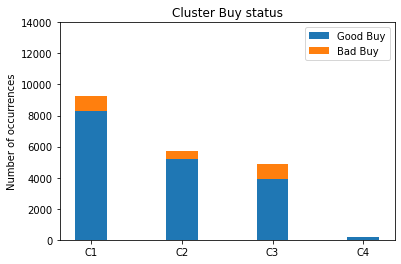

In [212]:
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, good, width)
p2 = plt.bar(ind, bad, width,
             bottom=good)

plt.ylabel('Number of occurrences')
plt.title('Cluster Buy status')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 15000, 2000))
plt.legend((p1[0], p2[0]), ('Good Buy', 'Bad Buy'))

plt.show()

SCAN DATAS

In [230]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [233]:
df = pd.read_csv('/content/DATA/training_cleansed.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [234]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo', 'VehYear']]
df_clus = df_clus[0:20000]

In [235]:
df_clus.corr()

AAAP      AACP      ARAP  ...  WarrantyCost    VehOdo   VehYear
AAAP          1.000000  0.990273  0.909891  ...     -0.057132 -0.029781  0.581205
AACP          0.990273  1.000000  0.901995  ...     -0.028159  0.011106  0.532820
ARAP          0.909891  0.901995  1.000000  ...     -0.057880  0.018373  0.581074
ARCP          0.909642  0.917761  0.990045  ...     -0.031678  0.049887  0.538895
CAAP          0.939290  0.925213  0.852640  ...     -0.061181 -0.040494  0.590389
CACP          0.933235  0.933149  0.849360  ...     -0.033426 -0.000393  0.548002
CRAP          0.870611  0.859571  0.913406  ...     -0.060825  0.002163  0.597204
CRCP          0.869744  0.870157  0.905811  ...     -0.033879  0.034119  0.557094
VehBCost      0.791432  0.783276  0.747464  ...     -0.039219 -0.075337  0.344432
WarrantyCost -0.057132 -0.028159 -0.057880  ...      1.000000  0.402873 -0.274464
VehOdo       -0.029781  0.011106  0.018373  ...      0.402873  1.000000 -0.286637
VehYear       0.581205  0.532820  0.581074  ...     -0.274464 -0.286637  1.000000

[12 rows x 12 columns]

In [236]:
df_1 = df_clus[['AAAP', 'VehOdo', 'VehBCost']]
df_2 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_3 = df_clus[['AAAP', 'VehOdo', 'WarrantyCost']]
df_4 = df_clus[['AAAP', 'VehBCost', 'VehYear']]

In [237]:
from sklearn.cluster import DBSCAN

In [238]:
to_db_scan = [df_1, df_2, df_3, df_4]
min_samp = []
epsilon = []
scaled_df = []
scaler = StandardScaler()

for i in range(5, 10):
  min_samp.append(math.pow(2, i))
p = 0.1
for i in range(0, 70):
  epsilon.append(p)
  p+=0.01

for e in to_db_scan:
  scaled_df.append(scaler.fit_transform(e.values))

In [239]:
plot_df_idx = 1
plot_eps = 0.45
plot_mp = 256
to_plot = to_db_scan[plot_df_idx]
columns = []
for c in to_plot.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

res = DBSCAN(eps=plot_eps, min_samples=plot_mp).fit(scaled_df[plot_df_idx])
print(np.unique(res.labels_, return_counts=True))

(array([-1,  0]), array([ 4378, 15622]))


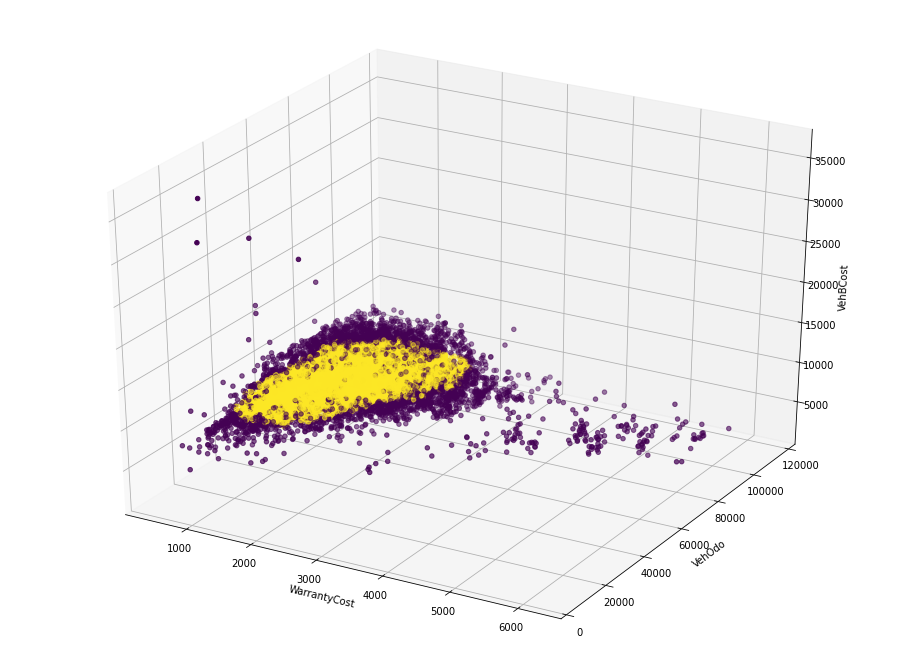

In [240]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [241]:
fig = go.Figure(data=[go.Scatter3d(
    x=to_plot[x],
    y=to_plot[y],
    z=to_plot[z],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

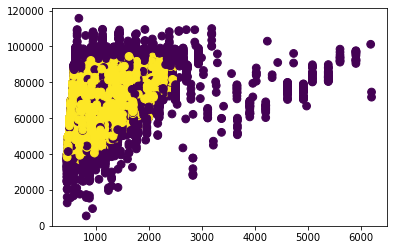

In [242]:
plt.scatter(to_plot['WarrantyCost'], to_plot['VehOdo'], 
            c=res.labels_, s=60)

In [244]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

In [245]:
def square_to_condensed(i, j, n):
    assert i != j, "no diagonal elements in condensed matrix"
    if i < j:
        i, j = j, i
    return n*j - j*(j+1)/2 + i - 1 - j

In [246]:
# SQUAREFORM
to_knee_square = []

for df_i, df in enumerate(to_knee_square):
  dist = []
  dist = squareform(pdist(df, 'euclidean'))
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()

In [247]:
to_knee = []
# to_knee = appl

for df_i, df in enumerate(to_knee):
  dist = []
  dist = (pdist(df, metric='euclidean'))  #distance vector (condensed matrix)
  kth_distances = []
  n = len(df_1)
  for i in range (0, n):
    d = []
    for j in range (0, n):
      if i != j:
        idx = round(square_to_condensed(i, j, n))
        d.append(dist[idx])
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
    if i % 1000 == 0:
      print("data frame ", df_i, ": ", i, " out of ", n)

  plt.clf()
  xLab = "Points sorted according to distance from " + str(
      5) + "th nearest neighbour"
  yLab = str(5) + "th nearest neighbour distance"
  plt.xlabel(xLab)
  plt.ylabel(yLab)
  plt.yticks(np.arange(0, 2, 0.1))
  ax = plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.grid(color='black', linestyle='-', linewidth=1)
  plt.show()

In [249]:
silu = {}
to_silu = []
#to_silu = appl

for idx, e in enumerate(to_silu):
  silu[str(idx)] = []

for idx, e in enumerate(to_silu):
  for i, p in enumerate(min_samp):
    #silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_, metric = 'euclidean'))
    silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_))
  print("end data frame ", idx)



Best clusters, data frame = [['AAAP', 'VehOdo', 'VehBCost']]:

    mp = 32 -> eps = 0.15, 0.16
    mp = 64 -> eps = 0.20
    mp = 128 -> eps = 0.25
    mp = 256 -> eps = 0.33, 0.34
    mp = 512 -> eps = 0.43

Best clusters, data frame = [['WarrantyCost', 'VehOdo', 'VehBCost']]:

    mp = 32 -> eps = 0.17
    mp = 64 -> eps = 0.22
    mp = 128 -> eps = 0.29
    mp = 256 -> eps = 0.38
    mp = 512 -> eps = 0.48



In [250]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [258]:
df = pd.read_csv('/content/DATA/training_cleansed.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

IsBadBuy   PurchDate  Auction  ...  VehBCost  IsOnlineSale WarrantyCost
0         1  10/25/2010    ADESA  ...    6100.0             0          533
1         0   5/27/2009  MANHEIM  ...    4000.0             0         1630
2         0   3/18/2010    OTHER  ...    7500.0             0          693
3         0  06/08/2009    OTHER  ...    4725.0             0         1633
4         0  03/04/2009  MANHEIM  ...    5670.0             0         1623

[5 rows x 33 columns]

In [261]:
df_clus = df.drop(columns=[
        'Trim',
        'WheelType',
        'PRIMEUNIT',
        'AUCGUART',
        'VNST',
        'IsBadBuy',
        'PurchDate',
        'Auction',
        'Make',
        'Model',
        'WheelTypeID',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'BYRNO',
        'TopThreeAmericanName',
        'SubModel',
        'VehicleAge',
        'IsOnlineSale'])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

VehYear  VehOdo    AAAP    AACP  ...     CRCP  VNZIP1  VehBCost  WarrantyCost
0     2008   61184  6796.0  7555.0  ...  10650.0   33619    6100.0           533
1     2006   92383  5480.0  6461.0  ...   7478.0   32124    4000.0          1630
2     2008   45965  8067.0  8580.0  ...  11350.0   74135    7500.0           693
3     2005   80169  4817.0  6658.0  ...   7691.0   85018    4725.0          1633
4     2005   77372  5430.0  6633.0  ...   7856.0   75236    5670.0          1623

[5 rows x 13 columns]

In [262]:
scaler = StandardScaler()
z_df_clus = scaler.fit_transform(df_clus.values)

In [263]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [264]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(z_df_clus)

KMeans(max_iter=500, n_clusters=5, n_init=50)

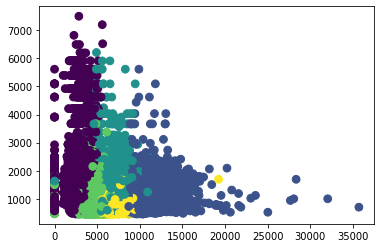

In [265]:
plt.scatter(df_clus['AAAP'], df_clus['WarrantyCost'], 
            c=kmeans.labels_, s=60)

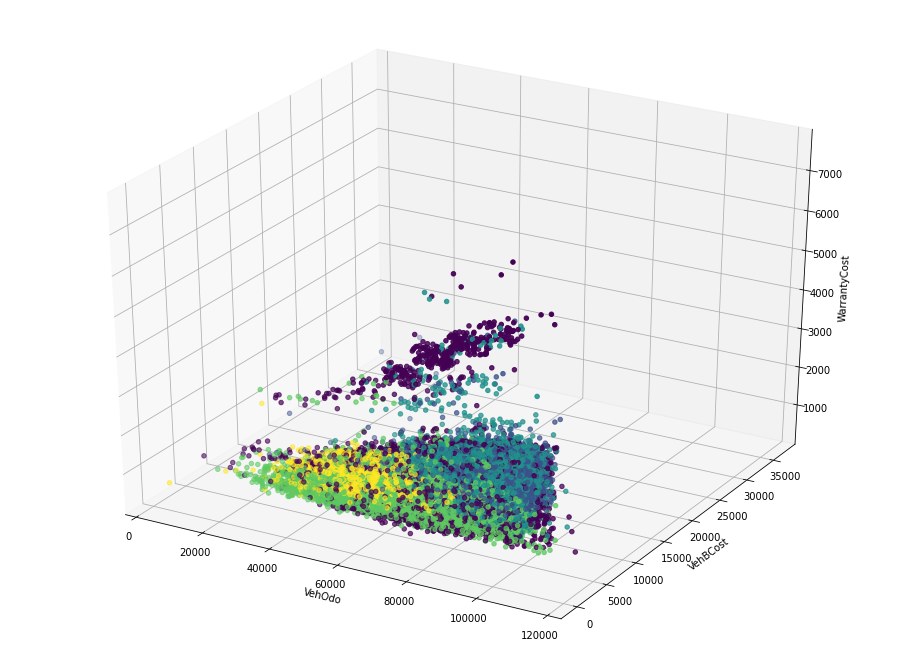

In [266]:
x = 'VehOdo'
y = 'VehBCost'
z = 'WarrantyCost'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_clus[x],
           df_clus[y],
           df_clus[z],
           c=kmeans.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [267]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_clus[x],
    y=df_clus[y],
    z=df_clus[z],
    mode='markers',
    marker=dict(
        size=2,
        #color=kmeans.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

K-Means with MinMax

In [268]:
scaler = MinMaxScaler()
minmax_df_clus = scaler.fit_transform(df_clus.values)

In [269]:
kmeans_2 = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans_2.fit(minmax_df_clus)

KMeans(max_iter=500, n_clusters=5, n_init=50)

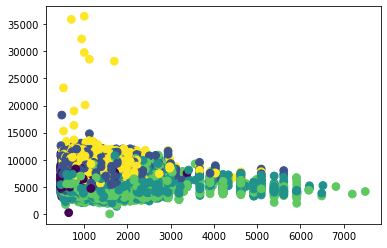

In [270]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans_2.labels_, s=60)

DBScanEvaluation

In [272]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [274]:
df = pd.read_csv('/content/DATA/training_cleansed.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [275]:
df_clus = df[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_clus = df_clus[0:20000]

In [276]:
param = [(32, 0.17), (64, 0.22), (128, 0.29), (256, 0.38), (512, 0.48)]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clus.values)

In [277]:
res = []

for p in param:
  res.append({
    'res': DBSCAN(eps=p[1], min_samples=p[0]).fit(scaled_df), 
    'ms': p[0],
    'eps': p[1]
  })

In [278]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

KNEE Method

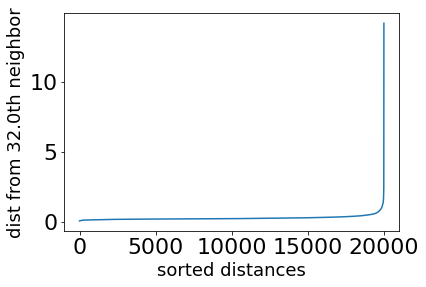

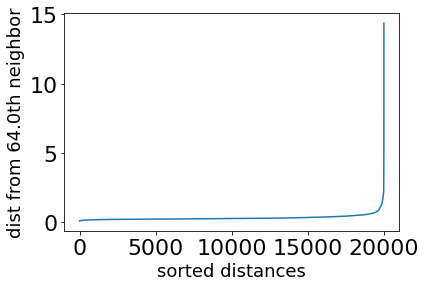

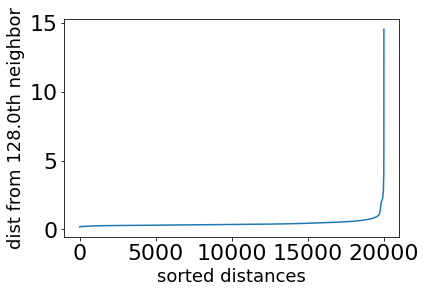

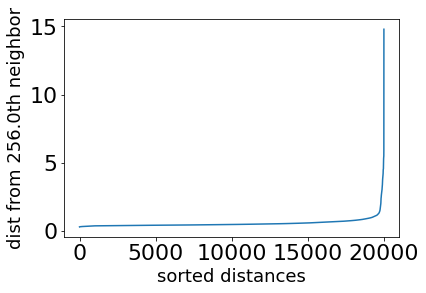

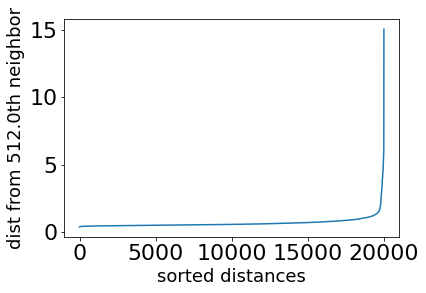

In [279]:
# SQUAREFORM
dist = squareform(pdist(scaled_df, 'euclidean')) # pair wise distance

for i in range(5, 10):
  k = math.pow(2, i)
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[int(k)]
    kth_distances.append(d[index_kth_distance]) 
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()

In [280]:
silu = []

for r in res:
  silu.append(silhouette_score(scaled_df, r['res'].labels_))

print(silu)


[-0.4018562651785567, -0.34720770115597105, -0.22223012402187622, -0.0868260071060077, -0.007282206583185902]


In [281]:
plot_idx = 3
plot_res = res[plot_idx]['res']
columns = []
for c in df_clus.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

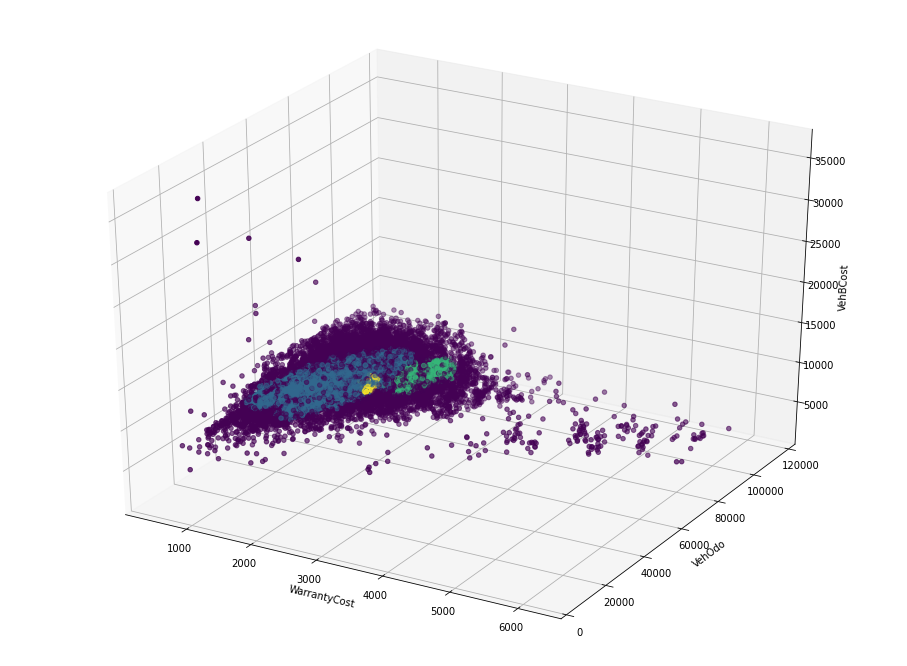

In [282]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_clus[x],
           df_clus[y],
           df_clus[z],
           c=plot_res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [283]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_clus[x],
    y=df_clus[y],
    z=df_clus[z],
    mode='markers',
    marker=dict(
        size=2,
        color=plot_res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

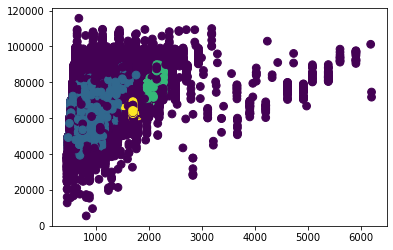

In [284]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehOdo'], 
            c=plot_res.labels_, s=60)

METHOD CLASSIFICATION

Random Forest

In [304]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [312]:
# READ AND DROP COLUMNS
df = pd.read_csv('/content/DATA/trainingnodate.csv')
df.dropna()
df.fillna(-99999, inplace=True)
y = df['IsBadBuy']
X = df.drop(columns=['IsBadBuy'])
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [25, 50, 100, 200, 500, 1000]
}

#scores = ['precision', 'recall', 'f1']
scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = RandomForestClassifier()
    
    if (score == "recall"):
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    else:
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> recall

Best parameters set found on development set:

{'n_estimators': 1000}

Grid scores on development set:

0.246 (+/-0.031) for {'n_estimators': 25}
0.248 (+/-0.035) for {'n_estimators': 50}
0.249 (+/-0.030) for {'n_estimators': 100}
0.249 (+/-0.035) for {'n_estimators': 200}
0.249 (+/-0.032) for {'n_estimators': 500}
0.250 (+/-0.033) for {'n_estimators': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     20524
           1       0.81      0.24      0.37      2831

    accuracy                           0.90     23355
   macro avg       0.86      0.62      0.66     23355
weighted avg       0.89      0.90      0.88     23355


# Tuning hyper-parameters for ----> f1

Best parameters set found on development set:

{'n_estimators': 500}

Grid scores on devel

Method: CV_KNN

In [313]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [315]:
# READ AND DROP COLUMNS
df = pd.read_csv('/content/DATA/trainingnodate.csv')
df.dropna()
df.fillna(-99999, inplace=True)
y = df['IsBadBuy']
X = df.drop(columns=['IsBadBuy'])
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = {
    'n_neighbors': list(range(1, 31, 3)),
    'weights': ['uniform', 'distance'],
}

#scores = ['precision', 'recall', 'f1']
scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = KNeighborsClassifier()   
    
    if (score == "recall"):
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    else:
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> recall

Best parameters set found on development set:

{'n_neighbors': 1, 'weights': 'uniform'}

Grid scores on development set:

0.326 (+/-0.026) for {'n_neighbors': 1, 'weights': 'uniform'}
0.326 (+/-0.026) for {'n_neighbors': 1, 'weights': 'distance'}
0.214 (+/-0.033) for {'n_neighbors': 4, 'weights': 'uniform'}
0.274 (+/-0.031) for {'n_neighbors': 4, 'weights': 'distance'}
0.236 (+/-0.023) for {'n_neighbors': 7, 'weights': 'uniform'}
0.241 (+/-0.029) for {'n_neighbors': 7, 'weights': 'distance'}
0.221 (+/-0.025) for {'n_neighbors': 10, 'weights': 'uniform'}
0.237 (+/-0.025) for {'n_neighbors': 10, 'weights': 'distance'}
0.230 (+/-0.027) for {'n_neighbors': 13, 'weights': 'uniform'}
0.235 (+/-0.027) for {'n_neighbors': 13, 'weights': 'distance'}
0.224 (+/-0.025) for {'n_neighbors': 16, 'weights': 'uniform'}
0.233 (+/-0.028) for {'n_neighbors': 16, 'weights': 'distance'}
0.229 (+/-0.024) for {'n_neighbors': 19, 'weights': 'uniform'}
0.232 (+/-0.026

Methhod: CV_Decision_Tree

In [316]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [317]:
# READ AND DROP COLUMNS
df = pd.read_csv('/content/DATA/trainingnodate.csv')
df.dropna()
df.fillna(-99999, inplace=True)
y = df['IsBadBuy']
X = df.drop(columns=['IsBadBuy'])
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}

#scores = ['precision', 'recall', 'f1']
scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = tree.DecisionTreeClassifier()
    
    if (score == "recall"):
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    else:
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)
                         
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> recall

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Grid scores on development set:

0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.256 (+/-0.033) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.256 (+/-0.033) for {'criterion': 'gini',

Method: CV_AdaBoost.

In [318]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [319]:
# READ AND DROP COLUMNS
df = pd.read_csv('/content/DATA/trainingnodate.csv')
df.dropna()
df.fillna(-99999, inplace=True)
y = df['IsBadBuy']
X = df.drop(columns=['IsBadBuy'])
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [5, 10, 25, 50, 100],
    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1],
 }

#scores = ['precision', 'recall', 'f1']
scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = AdaBoostClassifier()
    
    if (score == "recall"):
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    else:
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> recall

Best parameters set found on development set:

{'learning_rate': 0.1, 'n_estimators': 5}

Grid scores on development set:

0.256 (+/-0.033) for {'learning_rate': 0.1, 'n_estimators': 5}
0.256 (+/-0.033) for {'learning_rate': 0.1, 'n_estimators': 10}
0.199 (+/-0.021) for {'learning_rate': 0.1, 'n_estimators': 25}
0.233 (+/-0.020) for {'learning_rate': 0.1, 'n_estimators': 50}
0.237 (+/-0.030) for {'learning_rate': 0.1, 'n_estimators': 100}
0.210 (+/-0.090) for {'learning_rate': 0.25, 'n_estimators': 5}
0.202 (+/-0.026) for {'learning_rate': 0.25, 'n_estimators': 10}
0.234 (+/-0.028) for {'learning_rate': 0.25, 'n_estimators': 25}
0.239 (+/-0.029) for {'learning_rate': 0.25, 'n_estimators': 50}
0.239 (+/-0.030) for {'learning_rate': 0.25, 'n_estimators': 100}
0.183 (+/-0.028) for {'learning_rate': 0.5, 'n_estimators': 5}
0.224 (+/-0.026) for {'learning_rate': 0.5, 'n_estimators': 10}
0.233 (+/-0.029) for {'learning_rate': 0.5, 'n_estimators': 2